<a href="https://colab.research.google.com/github/Hithashreee/Iris-Flower-SVM/blob/main/Iris_Flower_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Flower data set:<br>
Unsupervised learning
K- means cluster
centroid concept

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [2]:
from sklearn.svm import SVC

In [3]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
data=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data['target']=iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
data['flower_name']=data.target.apply(lambda x:iris.target_names[x])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
data0 = data[data.target==0]
data1 = data[data.target==1]
data2 = data[data.target==2]
data0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [13]:
data2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


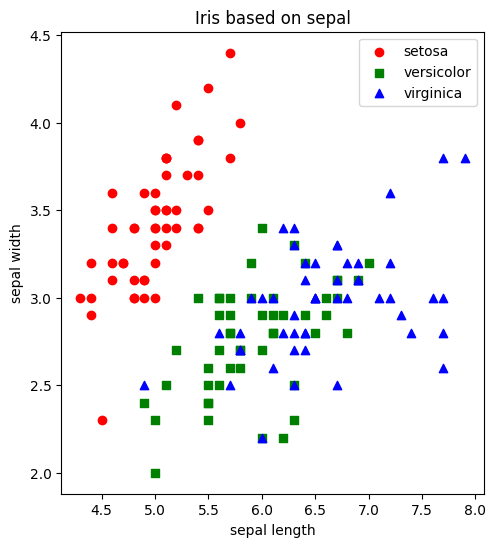

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data0['sepal length (cm)'],data0['sepal width (cm)'],color='r',marker='o',label=iris.target_names[0])
plt.scatter(data1['sepal length (cm)'],data1['sepal width (cm)'],color='g',marker='s',label=iris.target_names[1])
plt.scatter(data2['sepal length (cm)'],data2['sepal width (cm)'],color='b',marker='^',label=iris.target_names[2])
plt.title('Iris based on sepal')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

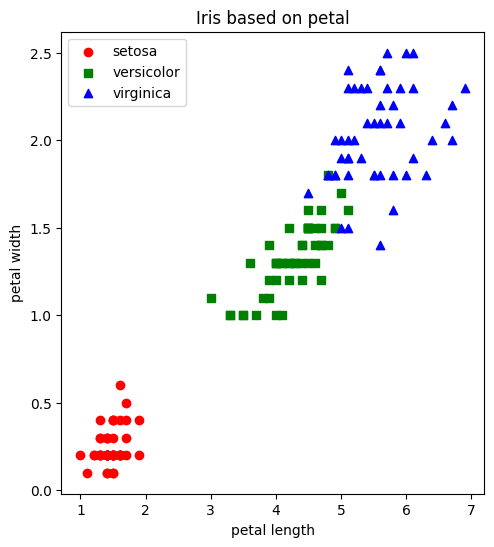

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data0['petal length (cm)'],data0['petal width (cm)'],color='r',marker='o',label=iris.target_names[0])
plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'],color='g',marker='s',label=iris.target_names[1])
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color='b',marker='^',label=iris.target_names[2])
plt.title('Iris based on petal')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

In [25]:
x=data.drop(['target','flower_name'],axis='columns')
y=data.target

In [27]:
x


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

model 1

In [48]:
model=SVC(C=1,kernel='linear')
model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [34]:
model.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [49]:
model.score(x_test,y_test)

0.9777777777777777

In [50]:
pred=model.predict(x_test)
pred

array([0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       0])

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
ac=accuracy_score(y_test,pred)
ac

0.9777777777777777

Model 2

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [62]:
model2=SVC(C=1,kernel='poly')
model2.fit(x_train,y_train)

SVC(C=1, kernel='poly')

In [63]:
model2.score(x_test,y_test)

1.0

In [65]:
pred2=model2.predict(x_test)
pred2

array([0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2,
       2, 0, 1, 1, 2, 2, 2, 1])

In [66]:
ac2=accuracy_score(y_test,pred2)
ac2

1.0